In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Third convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Fourth convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=20, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('mydata/train',
                                                 target_size=(64, 64),
                                                 batch_size=1,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('mydata/test',
                                            target_size=(64, 64),
                                            batch_size=1,
                                            color_mode='grayscale',
                                            class_mode='categorical') 
print(classifier.summary())


Found 6011 images belonging to 20 classes.
Found 2102 images belonging to 20 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
__________________________________

In [3]:
history =classifier.fit(
        training_set,
        steps_per_epoch= 6011, # No of images in training set
        epochs=50,
        validation_data=test_set,
        validation_steps=2102)# No of images in test set


Epoch 1/50
6011/6011 [==============================] - 329s 54ms/step - loss: 2.2481 - accuracy: 0.3014 - val_loss: 1.5545 - val_accuracy: 0.5990
Epoch 2/50
6011/6011 [==============================] - 128s 21ms/step - loss: 0.7184 - accuracy: 0.7735 - val_loss: 1.0948 - val_accuracy: 0.7088
Epoch 3/50
6011/6011 [==============================] - 116s 19ms/step - loss: 0.4860 - accuracy: 0.8504 - val_loss: 0.9207 - val_accuracy: 0.7241
Epoch 4/50
6011/6011 [==============================] - 113s 19ms/step - loss: 0.3798 - accuracy: 0.8858 - val_loss: 0.7272 - val_accuracy: 0.7921
Epoch 5/50
6011/6011 [==============================] - 120s 20ms/step - loss: 0.3082 - accuracy: 0.9027 - val_loss: 0.9167 - val_accuracy: 0.7602
Epoch 6/50
6011/6011 [==============================] - 122s 20ms/step - loss: 0.2788 - accuracy: 0.9119 - val_loss: 0.8897 - val_accuracy: 0.7883
Epoch 7/50
6011/6011 [==============================] - 122s 20ms/step - loss: 0.2662 - accuracy: 0.9231 - val_loss: 0

In [4]:
test_eval = classifier.evaluate(test_set, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.813260316848755
Test accuracy: 0.7868696451187134


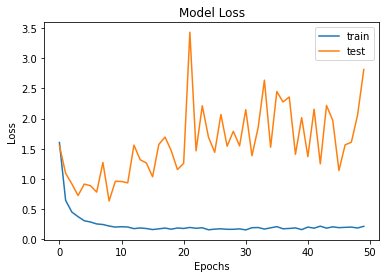

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

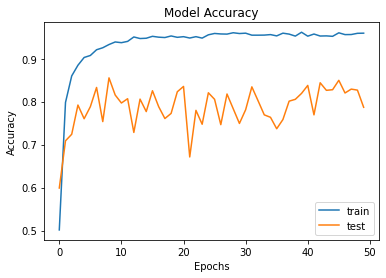

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [8]:

# Saving the model
model_json = classifier.to_json()
with open("oursecmodel-bw.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('oursecmodel-bw.h5')
